# Loading and Displaying and Prepairng Dataset

In [1]:
import __init__
from utils.dataloader import load_dataset
from utils import image
import numpy as np

# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset("../dataset/catvnotcat", 
                                                                                   'catvnotcat')

y = 1


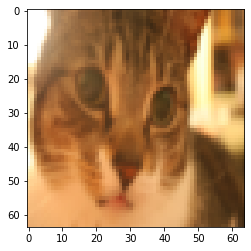

In [2]:
index = 200
image.display_image(train_set_x_orig[index], train_set_y[:,index][0])

**Train and Test size's + flatten + standardize dataset**

In [3]:
#`train_set_x_orig` is a numpy-array of shape (m_train, num_px, num_px, 3), test is similar to this one too!
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [4]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
print(f"m_train:{m_train},  m_test:{m_test},  num_px: {num_px}")

#flatten images into single vector
#train_set_x_flatten, test_set_x_flatten = image.flatten_X(train_set_x_orig), image.flatten_X(test_set_x_orig)

#or just simply use standarze_dataset to flatten and standardize it using x/255
train_set_x, test_set_x = image.standardize_dataset(train_set_x_orig), image.standardize_dataset(test_set_x_orig)

print ("train_set_x_flatten shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x[0:5,0]))

m_train:209,  m_test:50,  num_px: 64
train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [0.06666667 0.12156863 0.21960784 0.08627451 0.12941176]


## Two-layer neural network

```python
def initialize_parameters(n_x, n_h, n_y):
    ...
    return parameters 
def linear_activation_forward(A_prev, W, b, activation):
    ...
    return A, cache
def compute_cost(AL, Y):
    ...
    return cost
def linear_activation_backward(dA, cache, activation):
    ...
    return dA_prev, dW, db
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

In [5]:
from dnn import TwoLayerModel

(n_x, n_h, n_y) = 12288, 7, 1
layers_dims = (n_x, n_h, n_y)

model = TwoLayerModel(layers_dims, num_iterations = 2500, learning_rate = 0.0075)

Cost after iteration 0: 0.693049735659989
Cost after iteration 100: 0.6464320953428849
Cost after iteration 200: 0.6325140647912677
Cost after iteration 300: 0.6015024920354665
Cost after iteration 400: 0.5601966311605747
Cost after iteration 500: 0.5158304772764729
Cost after iteration 600: 0.47549013139433255
Cost after iteration 700: 0.4339163151225749
Cost after iteration 800: 0.4007977536203886
Cost after iteration 900: 0.35807050113237976
Cost after iteration 1000: 0.3394281538366413
Cost after iteration 1100: 0.30527536361962654
Cost after iteration 1200: 0.2749137728213016
Cost after iteration 1300: 0.24681768210614843
Cost after iteration 1400: 0.19850735037466105
Cost after iteration 1500: 0.17448318112556638
Cost after iteration 1600: 0.17080762978096964
Cost after iteration 1700: 0.11306524562164706
Cost after iteration 1800: 0.09629426845937154
Cost after iteration 1900: 0.08342617959726865
Cost after iteration 2000: 0.07439078704319087
Cost after iteration 2100: 0.0663074

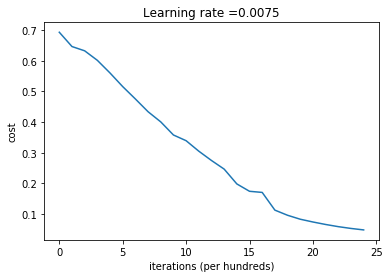

In [6]:
model.fit(train_set_x, train_set_y, verbose=True, plot_cost=True)

In [7]:
predicts = model.predict(train_set_x)

print("ACC of Train:", np.sum((predicts == train_set_y)/train_set_x.shape[1]))

predicts = model.predict(test_set_x)

print("ACC of Test:", np.sum((predicts == test_set_y)/test_set_x.shape[1]))

ACC of Train: 0.9999999999999998
ACC of Test: 0.72


## L-layer Neural Network

```python
def initialize_parameters_deep(layers_dims):
    ...
    return parameters 
def L_model_forward(X, parameters):
    ...
    return AL, caches
def compute_cost(AL, Y):
    ...
    return cost
def L_model_backward(AL, Y, caches):
    ...
    return grads
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```